In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0001263762"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0001263762
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,"SELECT BANCORP, INC."
Ticker,NCBC


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,48.0,8.837500e+00,9.954075e-01,7.14,8.15,8.895,9.222500e+00,11.04
interest income,54.0,8.367204e+06,2.614185e+06,2898000.00,6544750.00,8340500.000,9.447250e+06,14544000.00
net income,54.0,7.452222e+05,1.968834e+06,-8228000.00,405000.00,950000.000,1.579500e+06,4454000.00
net interest income,54.0,6.007444e+06,2.492013e+06,1984000.00,4377250.00,5355000.000,7.526750e+06,11929000.00
provision for loan losses,53.0,7.374717e+05,1.837234e+06,-2136000.00,150000.00,409000.000,6.850000e+05,12457000.00


# Plots

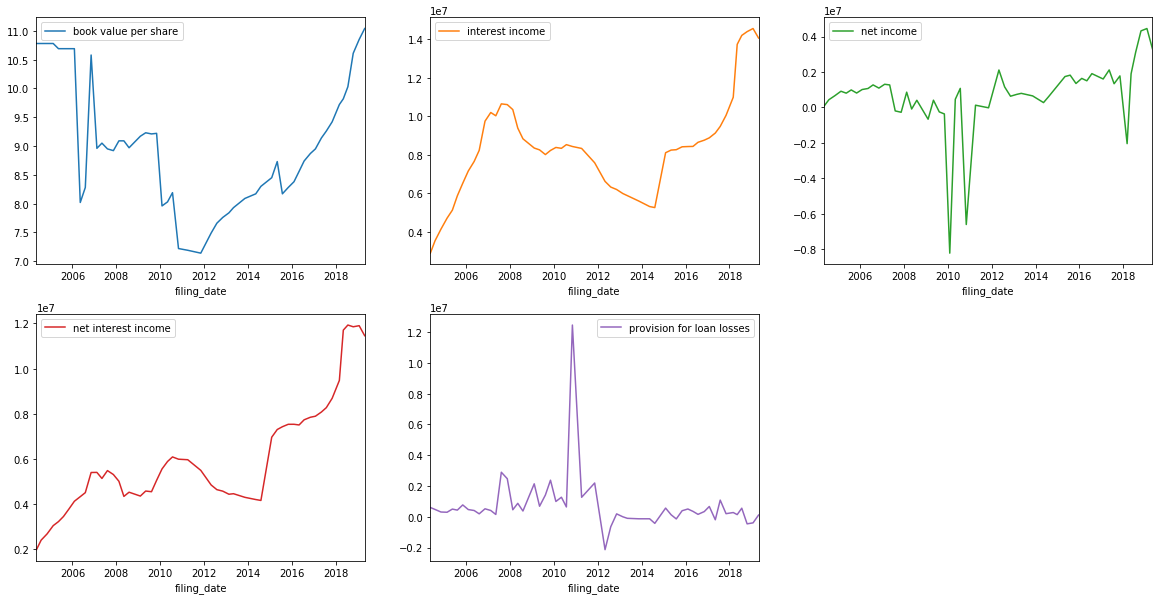

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                              
0001263762 book value per share       2004Q2 to 2004Q4: 3 periods  missing   
           book value per share       2005Q2 to 2005Q4: 3 periods  missing   
           book value per share                            2008Q3  missing   
           book value per share       2011Q1 to 2011Q2: 2 periods  missing   
           book value per share                            2011Q4  missing   
           book value per share                            2013Q2  missing   
           book value per share                            2013Q4  missing   
           book value per share                            2014Q3  missing   
           interest income                                 2008Q3  missing   
           interest income            2011Q1 to 2011Q2: 2 periods  missing   
           interest income                                 2011Q4  missing   
           interest income                                 2013Q2  missing   
           interest income                                 2013Q4  missing   
           interest income                                 2014Q3  missing   
           net income                                      2008Q3  missing   
           net income                 2011Q1 to 2011Q2: 2 periods  missing   
           net income                                      2011Q4  missing   
           net income                                      2013Q2  missing   
           net income                                      2013Q4  missing   
           net income                                      2014Q3  missing   
           net interest income                             2008Q3  missing   
           net interest income        2011Q1 to 2011Q2: 2 periods  missing   
           net interest income                             2011Q4  missing   
           net interest income                             2013Q2  missing   
           net interest income                             2013Q4  missing   
           net interest income                             2014Q3  missing   
           provision for loan losses                       2008Q3  missing   
           provision for loan losses  2011Q1 to 2011Q2: 2 periods  missing   
           provision for loan losses                       2011Q4  missing   
           provision for loan losses                       2013Q2  missing   
           provision for loan losses  2013Q4 to 2014Q1: 2 periods  missing   
           provision for loan losses                       2014Q3  missing   
           total revenue                                     None    empty   

                                                 message  
cik        item                                           
0001263762 book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net interest income

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()